**20164245 Hong Jin**

Build a binary classifier to classify digit 0 against all the other digits at MNIST dataset.

Let $x = (x_1, x_2, ... , x_m)$ be a vector representing an image in the dataset.

The prediction function $f_w(x)$ is defined by the linear combination of data (1, x) and the model parameter w:
$f_w(x) = w_0 * 1 + w_1 * x_1 + w_2 * x_2 + ... + w_m * x_m$ 

where $w = (w_0, w_1, ... , w_m)$

The prediction function $f_w(x)$ should have the following values:

$f_w(x) = +1$ if label(x) = 0

$f_w(x) = -1$ if label(x) is not 0

The optimal model parameter w is obtained by minimizing the following objective function:

$\sum_i ( f_w(x^(i)) - y^(i) )^2$

1. Compute an optimal model parameter using the training dataset
2. Compute (1) True Positive, (2) False Positive, (3) True Negative, (4) False Negative based on the computed optimal model parameter using (1) training dataset and (2) testing dataset.

# Set up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd

file_data = "mnist_train.csv"
handle_file = open(file_data, "r")
data = handle_file.readlines()
handle_file.close()

test_file_data = "mnist_test.csv"
test_handle_file = open(test_file_data, "r")
test_data = test_handle_file.readlines()
test_handle_file.close()

size_row = 28
size_col = 28
dim = size_col * size_row

num_image = len(data)
test_num_image = len(test_data)

# Normalization

In [2]:
def normalize(data):
    data_normalized = (data-min(data)) / (max(data) - min(data))
    return (data_normalized)

# Functions

In [3]:
def distance(x,y):
    d = x - y
    s = d ** 2
    return s
    
def check(M,val):
    length = len(M)
    res = np.zeros((length))
    for i in range(length):
        if(M[i] == val):
            res[i] = 1
        else:
            res[i] = -1
    return res

def sign(x):
    if(x>=0):
        return 1
    else:
        return -1

# Make label, image array with train, test data

In [4]:
list_image = np.empty((size_row * size_col, num_image), dtype=float)
list_label = np.empty(num_image, dtype=int)
test_list_image = np.empty((size_row * size_col, test_num_image), dtype=float)
test_list_label = np.empty(test_num_image, dtype=int)
count = 0
test_count = 0

for line in data:
    line_data = line.split(',')
    label = line_data[0]
    im_vector = np.asfarray(line_data[1:])
    im_vector = normalize(im_vector)
    
    list_label[count] = label
    list_image[:,count] = im_vector
    
    count += 1
    
for test_line in test_data:
    test_line_data = test_line.split(',')
    test_label = test_line_data[0]
    test_im_vector = np.asfarray(test_line_data[1:])
    test_im_vector = normalize(test_im_vector)
    
    test_list_label[test_count] = test_label
    test_list_image[:,test_count] = test_im_vector
    
    test_count += 1


# Define Matrix A

$f_i(x) = x^{i-1}, i = 1, \dots, p$

$\hat{f}(x) = \theta_1 + \theta_2 x + \cdots  + \theta_p x^{p-1}$

$A = \begin{bmatrix} 1 & x^{(1)} & \cdots & (x^{(1)})^{p-1} \\ 1 & x^{(2)} & \cdots & (x^{(2)})^{p-1} \\ \vdots & \vdots & & \vdots \\ 1 & x^{(N)} & \cdots & (x^{(N)})^{p-1}\end{bmatrix}$

($x^i$ means scalar $x$ to $i$th power; $x^{(i)}$ is $i$th data point)

$\theta = (A^T A)^{-1} A^T b$


In [5]:
R = np.zeros((dim,dim))
for i in range(dim):
    R[i] = np.random.normal(0,1,size=dim)

def defMatrix(x, p):
    model = np.zeros((dim,dim))
    for i in range(p):
        model[i] = R[i]
    return np.dot(model,x)

# Compute an optimal model parameter using the training dataset

In [6]:
scores = np.zeros(10)
B = np.matrix(np.transpose(check(list_label,0)))   # (60000, 1)
B_hat = check(list_label,0)
B_hat_test = check(test_list_label,0)

train_set = list_image[:54000]
test_set = list_image[54000:]

for j in range(10):
    p = 2**j
    feature = defMatrix(list_image, p)

    index = np.where(~feature.any(axis=1))[0]
    A = feature[~np.all(feature == 0, axis=1)]
    A = np.matrix(np.transpose(A))

    temp_theta = (A.T * A).I*A.T*B.T
    
    theta = np.zeros((size_col*size_row))
    count_num = 0
    
    for i in range(dim):
        if i not in index:
            theta[i]=temp_theta[count_num]
            count_num +=1
            
    nums = np.zeros((2,2))
    dist = 0
    min_num = 100000000
    feature = defMatrix(list_image, p)
    for i in range(count):
        dist += distance(theta, feature[:,i])

    for i in range(len(dist)):
        if(dist[i]!=0):
            if(dist[i] < min_num):
                min_num = dist[i]
    scores[j] = min_num
m = 2**np.argmin(scores)

# Plot Everage Image

In [7]:
def plotImage(im_avg):
    p1 = plt.subplot(2,2,1)
    p1.imshow(im_avg[:,0].reshape((size_row, size_col)),cmap='gray')
    p1.set_title("True Positive")
    p2 = plt.subplot(2,2,2)
    p2.imshow(im_avg[:,1].reshape((size_row, size_col)),cmap='gray')
    p2.set_title("False Positive")
    p3 = plt.subplot(2,2,3)
    p3.imshow(im_avg[:,2].reshape((size_row, size_col)),cmap='gray')
    p3.set_title("False Negative")
    p4 = plt.subplot(2,2,4)
    p4.imshow(im_avg[:,3].reshape((size_row, size_col)),cmap='gray')
    p4.set_title("True Negative")
    plt.subplots_adjust(hspace=1)

# Compute Accuracy

In [8]:
def computeAcc(image, counts, hat):
    nums = np.zeros((2,2))
    acc_num = 0
    nacc_num = 0
    im_avg = np.zeros((dim,4))
    feature = defMatrix(image, m)
    for i in range(counts):
        if sign(theta.dot(feature[:,i])) == 1:
            if(hat[i] == 1):
                # True Positive
                nums[0][0] += 1
                im_avg[:,0] += image[:,i]
                acc_num += 1
            else:
                # False Positive
                nums[1][0] += 1
                im_avg[:,1] += image[:,i]
                nacc_num += 1
        else:
            if(hat[i] == 1):
                # False Negative
                nums[0][1] += 1
                im_avg[:,2] += image[:,i]
                acc_num += 1
            else:
                # True Negative
                nums[1][1] += 1
                im_avg[:,3] += image[:,i]
                nacc_num += 1


    im_avg[:,0] /= nums[0,0]
    im_avg[:,1] /= nums[1,0]
    im_avg[:,2] /= nums[0,1]
    im_avg[:,3] /= nums[1,1]


    plotImage(im_avg)

    tp = nums[0,0] / acc_num
    fp = nums[1,0] / nacc_num
    tn = nums[1,1] / nacc_num
    fn = nums[0,1] / acc_num
        
    
    print("Tp = " + str(tp) + ", count = " + str(nums[0,0]))
    print("Fp = " + str(fp) + ", count = " + str(nums[1,0]))
    print("Fn = " + str(fn) + ", count = " + str(nums[0,1]))
    print("Tn = " + str(tn) + ", count = " + str(nums[1,1]))
    print("Zero = " + str(tp+fn))
    print("Not Zero = " + str(fp + tn))
    
    return tp, fp, tn, fn

# Compute (1) True Positive, (2) False Positive, (3) True Negative, (4) False Negative

In [9]:
feature = defMatrix(list_image, m)
index = np.where(~feature.any(axis=1))[0]
A = feature[~np.all(feature == 0, axis=1)]
A = np.matrix(np.transpose(A))
B = np.matrix(np.transpose(check(list_label,0)))   # (60000, 1)

temp_theta = (A.T * A).I*A.T*B.T
theta = np.zeros((dim))
count_num = 0

for i in range(dim):
    if i not in index:
        theta[i]=temp_theta[count_num]
        count_num +=1

## Training set

Tp = 0.9024143170690528, count = 5345.0
Fp = 0.006194870277567173, count = 335.0
Fn = 0.09758568293094716, count = 578.0
Tn = 0.9938051297224328, count = 53742.0
Zero = 1.0
Not Zero = 1.0


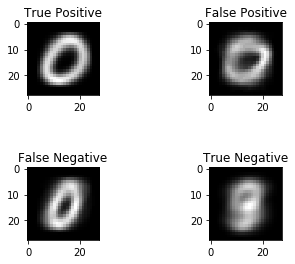

In [10]:
tp, fp, tn, fn = computeAcc(list_image, count, B_hat)

In [11]:
data = {'Zero' : [tp, fn],
            'nonZero' : [fp, tn]}
frame = DataFrame(data, columns = ['Zero', 'nonZero'], index = ['Positive', 'Negative'])
frame    

,Zero,nonZero
Positive,0.902414,0.006195
Negative,0.097586,0.993805


## Test set

Tp = 0.9346938775510204, count = 916.0
Fp = 0.005875831485587583, count = 53.0
Fn = 0.0653061224489796, count = 64.0
Tn = 0.9941241685144124, count = 8967.0
Zero = 1.0
Not Zero = 1.0


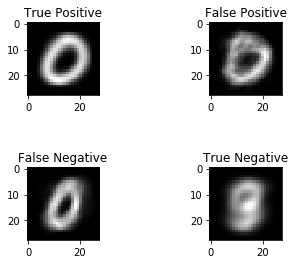

In [12]:
tp, fp, tn, fn = computeAcc(test_list_image, test_count, B_hat_test)

In [13]:
data = {'Zero' : [tp, fn],
            'nonZero' : [fp, tn]}
frame = DataFrame(data, columns = ['Zero', 'nonZero'], index = ['Positive', 'Negative'])
frame   

,Zero,nonZero
Positive,0.934694,0.005876
Negative,0.065306,0.994124
